## Actividad 11. Análisis de componentes y mapas autoorganizados.

Se presenta a continuación el desarrollo de la actividad 11.

1. Usando la herramienta de grabación de tu teléfono móvil, captura un breve mensaje (de 15 a 20 segundos) en el que digas tu nombre, así como la fecha y el lugar en donde te encuentras. Repite esta misma operación varias veces y en diversos lugares. Busca un lugar en donde la señal grabada se pueda contaminar fácilmente con ruido (cerca de una avenida, música de fondo, ruidos mecánicos, lluvia, entre otros).

1. Utilizando los conocimientos sobre el análisis de componentes, elabora un modelo de aprendizaje automático que pueda filtrar la señal de entrada y separar el mensaje (sonido de la voz) del ruido de fondo. Realiza las pruebas necesarias para evaluar la calidad de tu modelo.

1. Con las muestras de ruido obtenidas después de ejecutar el paso 2, construye y entrena un mapa autoorganizado de características que permita determinar a qué grupo pertenece y, por ende, te facilite determinar en qué lugar se realizó la captura original. Toma en cuenta que debes preprocesar dichas señales para que puedan usarse por la red neuronal. Realiza las pruebas necesarias para evaluar la calidad de tu modelo.

1. Agrupa ambos modelos en un solo programa de Python, genera nuevas muestras en condiciones parecidas a las originales y evalúa el funcionamiento completo de tu propuesta. ¿Los resultados fueron los adecuados?


In [118]:
import numpy as np
from scipy.io import wavfile
import wave
from scipy import signal
from sklearn.decomposition import FastICA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [120]:

mix1 = wave.open('https://github.com/janus78/MasterIA-Notebooks_Tetra3/blob/master/audio/tel/VozCalle_1.wav')
mix2 = wave.open('https://github.com/janus78/MasterIA-Notebooks_Tetra3/blob/master/audio/tel/VozCalle_2.wav')
mix3 = wave.open('https://github.com/janus78/MasterIA-Notebooks_Tetra3/blob/master/audio/tel/VozCalle_3.wav')

OSError: [Errno 22] Invalid argument: 'https://github.com/janus78/MasterIA-Notebooks_Tetra3/blob/master/audio/tel/VozCalle_1.wav'

In [104]:
print(f"Parámetros archivo 1: {mix1.getparams()}\nParámetros archivo 2: {mix2.getparams()}\nParámetros archivo 3: {mix3.getparams()}")
print(f"La duración del audio es: {mix1.getnframes()/mix1.getframerate()}")

Parámetros archivo 1: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 2: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
Parámetros archivo 3: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=661500, comptype='NONE', compname='not compressed')
La duración del audio es: 15.0


In [105]:
signal_1_raw = mix1.readframes(-1)
signal_1 = np.frombuffer(signal_1_raw, 'int16')
signal_2_raw = mix2.readframes(-1)
signal_2 = np.frombuffer(signal_2_raw, 'int16')
signal_3_raw = mix3.readframes(-1)
signal_3 = np.frombuffer(signal_3_raw, 'int16')

In [106]:
sampling_rate = mix1.getframerate()
duracion = np.linspace(0, len(signal_1)/sampling_rate, num=len(signal_1))

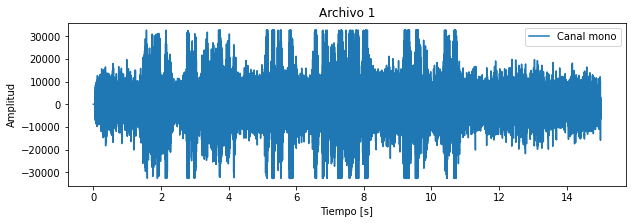

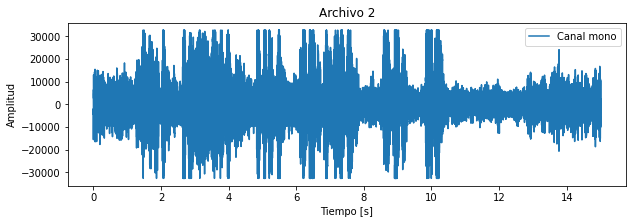

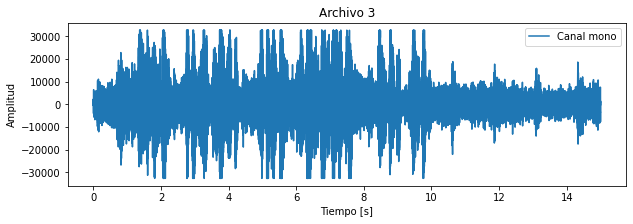

In [107]:
plt.plot(duracion, signal_1, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 1')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()
plt.plot(duracion, signal_2, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 2')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()
plt.plot(duracion, signal_3, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 3')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()

In [108]:
S= list(zip(signal_1, signal_2, signal_3))

In [109]:
S = (S/S.std(axis=0))

In [110]:
A = np.array([[1, 1, 1], [0.8, 4, 2], [3, 0.5, 9]])
det = np.linalg.det(A)
det

22.200000000000003

In [111]:
X = np.dot(S, A.T)
X.shape

(661500, 3)

In [112]:
ica = FastICA(n_components=2)
ica_result = ica.fit_transform(X)
ica_mixing = ica.mixing_

E:\PracticaDev\Python\DataspellProjects\venv\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


In [113]:
ica_result.shape

(661500, 2)

In [114]:
ica_mixing

array([[ -8352829.30425871,  -6675093.78908509],
       [-14367456.15746277, -26124445.74556513],
       [-59589105.21398379,  -2715958.26702324]])

In [115]:
signal_1 = ica_result[:, 0]
signal_2 = ica_result[:, 1]
#signal_3 = ica_result[:, 2]

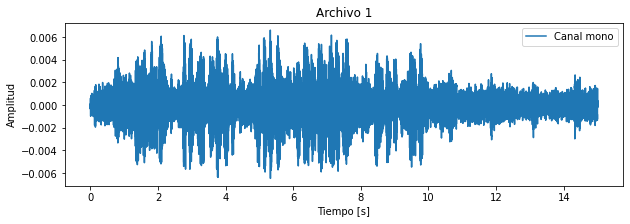

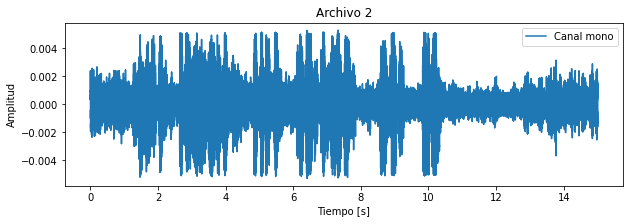

In [116]:
plt.plot(duracion, signal_1, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 1')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()
plt.plot(duracion, signal_2, label="Canal mono")
plt.rcParams["figure.figsize"] = (10, 3)
plt.legend()
plt.title('Archivo 2')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()
#plt.plot(tiempo, signal_3, label="Canal mono")
#plt.rcParams["figure.figsize"] = (10, 3)
#plt.legend()
#plt.title('Archivo 2')
#plt.xlabel("Tiempo [s]")
#plt.ylabel("Amplitud")
#plt.show()


In [117]:
rs1_int = np.int16(signal_1*32767*100)
rs2_int = np.int16(signal_2*32767*100)
wavfile.write('Audio/result1.wav', sampling_rate, rs1_int)
wavfile.write('Audio/result2.wav', sampling_rate, rs2_int)

In [ ]:
import librosa